In [1]:
import os
os.environ['USE_PYGEOS'] = '0'
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx 
from shapely.geometry import Point, LineString, shape
import shapely
import numpy as np

In [2]:
main_folder_path =os.path.normpath(os.getcwd() + os.sep + os.pardir)

In [3]:
df =pd.read_csv(main_folder_path+"\\data\\bridges_cleaned.csv")

In [4]:
df

,Unnamed: 0,index,road,km,type,name,length,condition,lat,lon,model_type
0,0,0,N1,0.000,sourcesink,sourcesink,0.00,NaN,23.706028,90.443333,sourcesink
1,1,0,N1,1.800,Box Culvert,.,11.30,A,23.698739,90.458861,bridge
2,2,1,N1,4.925,Box Culvert,.,6.60,A,23.694664,90.487775,bridge
3,3,2,N1,8.976,PC Girder Bridge,KANCHPUR PC GIRDER BRIDGE,397.00,C,23.705060,90.523214,bridge
4,4,3,N1,10.543,Box Culvert,KATCHPUR BOX CULVERT,8.00,B,23.696400,90.535099,bridge
...,...,...,...,...,...,...,...,...,...,...,...
19208,19208,17516,Z8943,6.692,Truss with Steel Deck,.,31.07,A,22.428621,90.788543,bridge
19209,19209,17517,Z8943,6.767,Box Culvert,.,1.93,A,22.428872,90.787904,bridge
19210,19210,17518,Z8943,8.104,RCC Girder Bridge,.,12.00,C,22.430219,90.775203,bridge
19211,19211,17519,Z8943,8.609,Truss with Steel Deck,.,31.07,A,22.428889,90.788333,bridge


In [5]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326")

In [6]:
gdf

,Unnamed: 0,index,road,km,type,name,length,condition,lat,lon,model_type,geometry
0,0,0,N1,0.000,sourcesink,sourcesink,0.00,NaN,23.706028,90.443333,sourcesink,POINT (90.44333 23.70603)
1,1,0,N1,1.800,Box Culvert,.,11.30,A,23.698739,90.458861,bridge,POINT (90.45886 23.69874)
2,2,1,N1,4.925,Box Culvert,.,6.60,A,23.694664,90.487775,bridge,POINT (90.48777 23.69466)
3,3,2,N1,8.976,PC Girder Bridge,KANCHPUR PC GIRDER BRIDGE,397.00,C,23.705060,90.523214,bridge,POINT (90.52321 23.70506)
4,4,3,N1,10.543,Box Culvert,KATCHPUR BOX CULVERT,8.00,B,23.696400,90.535099,bridge,POINT (90.53510 23.69640)
...,...,...,...,...,...,...,...,...,...,...,...,...
19208,19208,17516,Z8943,6.692,Truss with Steel Deck,.,31.07,A,22.428621,90.788543,bridge,POINT (90.78854 22.42862)
19209,19209,17517,Z8943,6.767,Box Culvert,.,1.93,A,22.428872,90.787904,bridge,POINT (90.78790 22.42887)
19210,19210,17518,Z8943,8.104,RCC Girder Bridge,.,12.00,C,22.430219,90.775203,bridge,POINT (90.77520 22.43022)
19211,19211,17519,Z8943,8.609,Truss with Steel Deck,.,31.07,A,22.428889,90.788333,bridge,POINT (90.78833 22.42889)


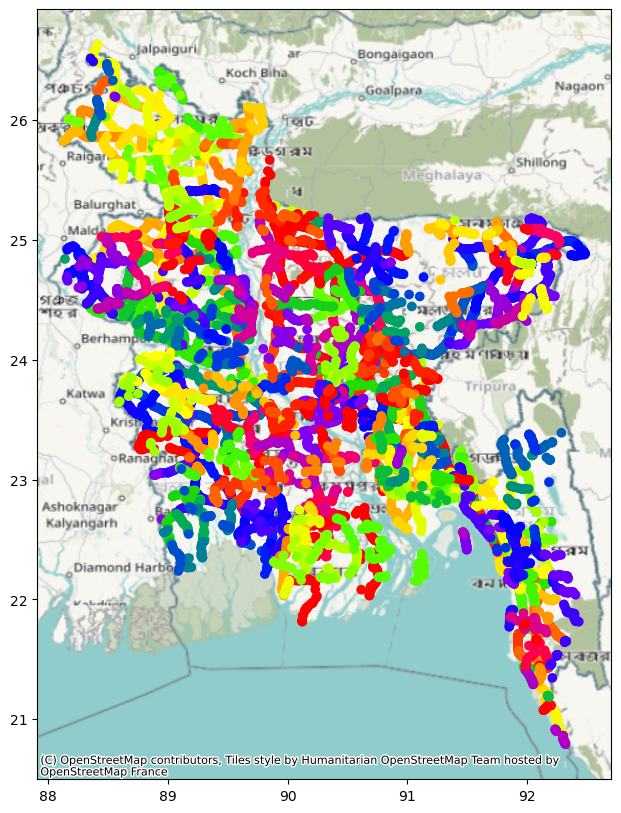

In [7]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

gdf.plot(ax=ax,cmap="prism")
cx.add_basemap(ax,crs="EPSG:4326")

In [8]:
road_names =gdf["road"].unique()
road_names_N1=[road for road in road_names if road.startswith("N")]

In [9]:

# print(road_names)
line_dict = {}
for road_name in road_names_N1:
    # if road_name.startswith('N'):
    bridges_road = gdf[gdf["road"] == road_name]
        # bridges_road=bridges_road.sort_ values(by=['km'])
    if len(bridges_road["geometry"]) >= 2:
            
        line_dict[road_name] =LineString(bridges_road["geometry"])
        

gseries =gpd.GeoSeries(line_dict.values(), index=line_dict.keys(), crs=4326)
    

In [10]:
cross_index = []
for index in gseries.index:
    if gseries["N1"].intersects(gseries[index]):
        cross_index.append(index)
    elif gseries["N2"].intersects(gseries[index]):
        cross_index.append(index)


In [11]:
cross_index

['N1', 'N104', 'N105', 'N108', 'N112', 'N120', 'N2', 'N208', 'N209']

<Axes: >

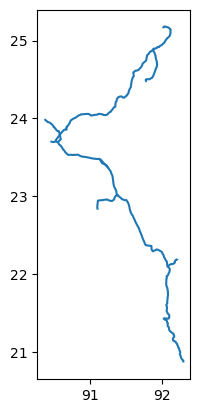

In [12]:
gseries[gseries.index.isin(cross_index)].plot()

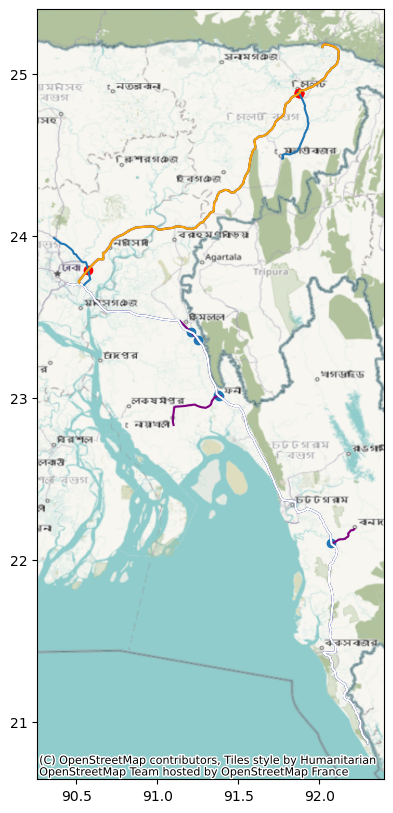

In [13]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

Intersecting_1 =[line for line in gseries if gseries["N1"].intersects(line)]
intersections_1 =gseries["N1"].intersection(Intersecting_1)

# Intersecting =[line for line in gseries if gseries["N1"].intersects(line)]
# intersections =gseries["N1"].intersection(Intersecting)

# fig, ax = plt.subplots(1,1,figsize=(10,10))
gpd.GeoSeries(Intersecting_1, crs=4326).plot(ax=ax,color="purple")
gpd.GeoSeries(intersections_1, crs=4326).plot(ax=ax)
gpd.GeoSeries(gseries["N1"],crs=4326).plot(ax=ax,color="white")


Intersecting =[line for line in gseries if gseries["N2"].intersects(line)]
intersections =gseries["N2"].intersection(Intersecting)


gpd.GeoSeries(intersections, crs=4326).plot(ax=ax,color="red")
gpd.GeoSeries(Intersecting, crs=4326).plot(ax=ax)
gpd.GeoSeries(gseries["N2"],crs=4326).plot(ax=ax,color="orange")
cx.add_basemap(ax=ax,crs=4326)

In [14]:
filter =['N1', 'N102', 'N104', 'N105', 'N112', 'N120', 'N129', 'N2', 'N203', 'N209']

<Axes: >

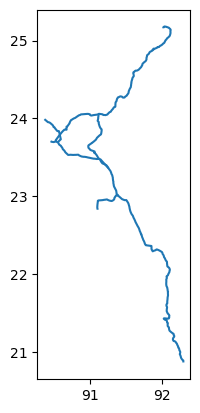

In [15]:
gseries[gseries.index.isin(filter)].plot()

In [16]:

multi_point =intersections[1]

[p for p in multi_point.geoms]

[<LINESTRING (90.521 23.706, 90.516 23.718)>,
 <LINESTRING (90.516 23.718, 90.569 23.785)>,
 <LINESTRING (90.569 23.785, 90.574 23.789)>,
 <LINESTRING (90.574 23.789, 90.581 23.798)>,
 <LINESTRING (90.581 23.798, 90.587 23.804)>,
 <LINESTRING (90.587 23.804, 90.595 23.814)>,
 <LINESTRING (90.595 23.814, 90.598 23.818)>,
 <LINESTRING (90.598 23.818, 90.604 23.824)>,
 <LINESTRING (90.604 23.824, 90.609 23.83)>,
 <LINESTRING (90.609 23.83, 90.616 23.836)>,
 <LINESTRING (90.616 23.836, 90.623 23.842)>,
 <LINESTRING (90.623 23.842, 90.627 23.846)>,
 <LINESTRING (90.627 23.846, 90.632 23.85)>,
 <LINESTRING (90.632 23.85, 90.639 23.855)>,
 <LINESTRING (90.639 23.855, 90.652 23.855)>,
 <LINESTRING (90.652 23.855, 90.659 23.855)>,
 <LINESTRING (90.659 23.855, 90.664 23.854)>,
 <LINESTRING (90.664 23.854, 90.667 23.854)>,
 <LINESTRING (90.667 23.854, 90.667 23.878)>,
 <LINESTRING (90.667 23.878, 90.666 23.882)>,
 <LINESTRING (90.666 23.882, 90.667 23.894)>,
 <LINESTRING (90.667 23.894, 90.672 23

In [17]:
# print(type(multi_points[0]))

In [18]:
import shapely.geometry.multipoint

In [19]:
multi_points =np.delete(intersections, 0)
separate=[] 
for multi_point in multi_points:
    if isinstance(multi_point, shapely.geometry.multipoint.MultiPoint):
        # print("klaas")
        separate.extend([p for p in multi_point.geoms])


<Axes: >

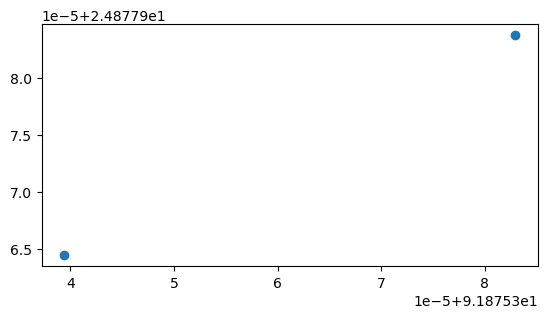

In [20]:
gpd .GeoSeries(separate,crs= 4326).plot()

In [21]:
a= round(2.3383874390,5)
print(a)

2.33839
